***Classification with classical ML methods***

*Here I test the performance of various classical ML methods for classification*

* - K Nearest neighbors 
* - Decision Tree
* - Random Forest 


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv('PR-graphomics/reduced_graphomics.csv')





**KNN**

As a first step I built a search algorithm that goes through different values of K and verify performance on the best of the batch:



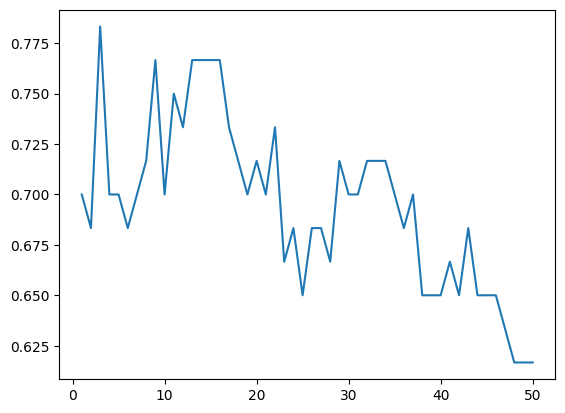

Accuracy: 0.72, with number of neighbors 3

Classification Report:
              precision    recall  f1-score   support

          PD       0.58      0.50      0.54        30
   Prodromal       0.56      0.63      0.59        30

    accuracy                           0.57        60
   macro avg       0.57      0.57      0.56        60
weighted avg       0.57      0.57      0.56        60



In [4]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = pd.DataFrame.copy(df)
y = X.pop('Group')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_cont, y_test, y_cont = train_test_split(X_test, y_test, test_size=.5, random_state=42)
# Initialize the KNN classifier with k=5
nearest_neighbors = np.arange(1, 51)
accuracies = []
for nn in nearest_neighbors:
    knn = KNeighborsClassifier(n_neighbors=nn)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)

    # Predict the labels of the test set
    y_pred = knn.predict(X_test)

    # Calculate accuracy and print a classification report
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    #print(f"Accuracy: {accuracy:.2f}, with number of neighbors {nn}")

#shows the results of spanning the various values of nn
plt.plot(nearest_neighbors, accuracies)
plt.show()

nn = nearest_neighbors[np.argmax(np.array(accuracies))]
knn = KNeighborsClassifier(n_neighbors=nn)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_cont)

accuracy = accuracy_score(y_cont, y_pred)
print(f"Accuracy: {accuracy:.2f}, with number of neighbors {nn}")


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

To improve performance, chatGPT suggest to: 
- check for other parameters (distance metrics, weight vs distance...)
- standardize the inputs

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd

# Assuming reduced_data is already loaded
X = pd.DataFrame.copy(df)
y = X.pop('Group')

# Encode the target labels (to avoid constant warnings by the grid search)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_cont, y_test, y_cont = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_cont = scaler.transform(X_cont)

# Set up the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': np.arange(1, 51),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN model and GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Retrieve and print the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best parameters found:", best_params)
print(f"Best cross-validated accuracy: {best_score:.2f}")

# Train a final model with the best parameters
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

# Evaluate on the test set
y_pred = best_knn.predict(X_cont)
accuracy = accuracy_score(y_cont, y_pred)
print(f"Final model accuracy on test set: {accuracy:.2f}")

print("\nClassification Report on Test Set:")
print(classification_report(y_cont, y_pred, target_names=label_encoder.classes_))

Best parameters found: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'uniform'}
Best cross-validated accuracy: 0.81
Final model accuracy on test set: 0.80

Classification Report on Test Set:
              precision    recall  f1-score   support

          PD       0.79      0.84      0.81        31
   Prodromal       0.81      0.76      0.79        29

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



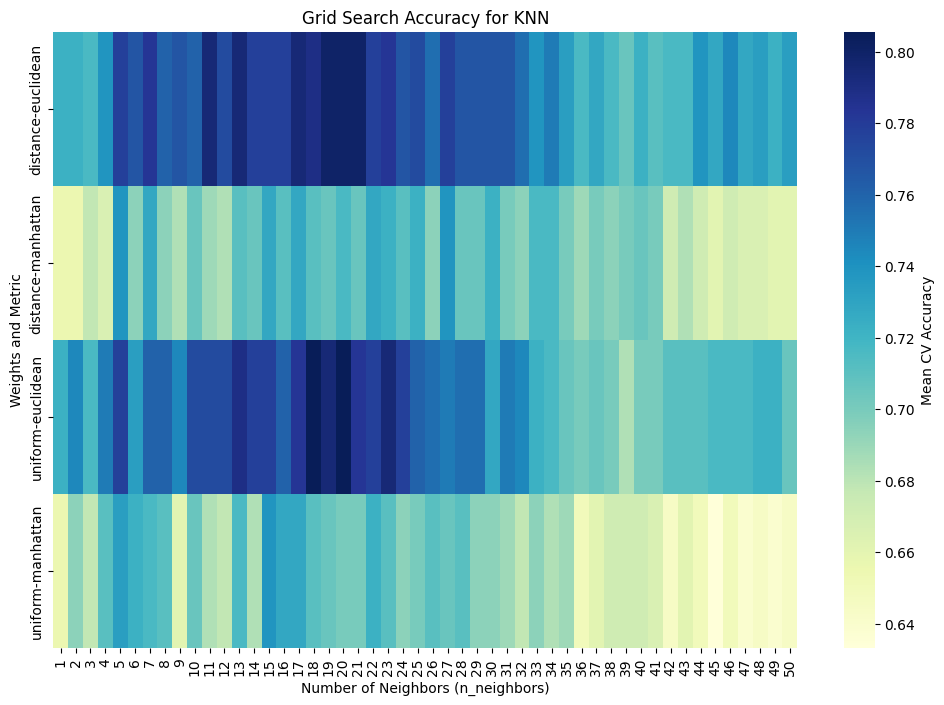

In [17]:
import seaborn as sns
# Convert grid search results to a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Create a pivot table to structure data for the heatmap
pivot_table = results_df.pivot_table(
    values="mean_test_score",
    index=["param_weights", "param_metric"],
    columns="param_n_neighbors"
)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=False, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Mean CV Accuracy'})
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Weights and Metric")
plt.title("Grid Search Accuracy for KNN")
plt.show()

**Decision Trees and Random Forests**

- performance here sucks even more with my method, let's see what chat thinks about it
